In [34]:
import numpy as np

xsL = [(0,1),(0,1)]
qs  = (0,1,2)

if True:
    ys  = ((0,0), (0,1), (1,0), (1,1))

    pX0X1 = np.array([[1, 0.1],[0.2,1]]).astype('float')
    #pX0X1 = np.eye(2)
    pX0X1 /= pX0X1.sum()

    pXY = {}
    for xix, xs in enumerate(xsL):
        pXY[xix] = np.zeros((len(xs),len(ys)))
        for xndx, x in enumerate(xs):
            for yndx, y in enumerate(ys):
                if y[xix] == x:
                    pXY[xix][xndx,yndx] = pX0X1[y[0],y[1]]
                    #print('h x%d=%d y=%s'%(xix, x, y),  y[0],y[1])
        pXY[xix]/=pXY[xix].sum()

    pY = pXY[0].sum(axis=0)
    # print(pY)
    assert(np.allclose(pY, pXY[1].sum(axis=0)))

else:
    ys  = (0,1)
    pYX0X1 = np.random.random((len(ys),len(xsL[0]),len(xsL[1])))
    pYX0X1 /= pYX0X1.sum()
    
    pY = pYX0X1.sum(axis=-1).sum(axis=-1)
    pXY= {}
    pXY[0] = pYX0X1.sum(axis=-1).T
    pXY[1] = pYX0X1.sum(axis=1).T
assert(np.allclose(pY, pXY[0].sum(axis=0)))
assert(np.allclose(pY, pXY[1].sum(axis=0)))


In [35]:
ixs = {}
for q in qs[:-1]:
    for y in ys:
        ixs[('q|y',q,y)] = len(ixs)
for q in qs[:-1]:
    for xix, xs in enumerate(xsL):
        for x in xs:
            ixs[('q|x%d'%xix,q,x)] = len(ixs)
N = len(ixs)
print(ixs)

{('q|y', 0, (0, 0)): 0, ('q|y', 0, (0, 1)): 1, ('q|y', 0, (1, 0)): 2, ('q|y', 0, (1, 1)): 3, ('q|y', 1, (0, 0)): 4, ('q|y', 1, (0, 1)): 5, ('q|y', 1, (1, 0)): 6, ('q|y', 1, (1, 1)): 7, ('q|x0', 0, 0): 8, ('q|x0', 0, 1): 9, ('q|x1', 0, 0): 10, ('q|x1', 0, 1): 11, ('q|x0', 1, 0): 12, ('q|x0', 1, 1): 13, ('q|x1', 1, 0): 14, ('q|x1', 1, 1): 15}


In [36]:
A = []
for q in qs[:-1]:
    for xix, xs in enumerate(xsL):
        for x in xs:
            r = np.zeros(N)
            r[ixs[('q|x%d'%xix,q,x)]] = 1
            A.append(r)
            

for xix, xs in enumerate(xsL):
    for x in xs:
        r = np.zeros(N)
        for q in qs[:-1]:
            r[ixs[('q|x%d'%xix,q,x)]] = 1
        A.append(r)

B = []

for yndx, y in enumerate(ys):
    for q in qs:
        for xix, xs in enumerate(xsL):
            r = np.zeros(N)
            if q == qs[-1]:
                for q2 in qs[:-1]:
                    r[ixs[('q|y',q2,y)]] = pY[yndx]
            else:
                r[ixs[('q|y',q,y)]] = -pY[yndx]
                
            for xndx, x in enumerate(xs):
                if q == qs[-1]:
                    for q2 in qs[:-1]:
                        r[ixs[('q|x%d'%xix,q2,x)]] = -pXY[xix][xndx,yndx]
                else:
                        r[ixs[('q|x%d'%xix,q,x)]] = -pXY[xix][xndx,yndx]
            #print(len(B), ('q|y',q,y), ('q|x%d'%xix,q,x))
            B.append(r)


In [37]:
Amx = np.array(A)
Bmx = np.array(B)
Cmx = np.vstack([A,B])
print('shape(A) = %s, rank(A) = %d' % (Amx.shape,np.linalg.matrix_rank(Amx)))
print('shape(B) = %s, rank(B) = %d' % (Bmx.shape,np.linalg.matrix_rank(Bmx)))
print('shape(C) = %s, rank(C) = %d' % (Cmx.shape,np.linalg.matrix_rank(Cmx)))
#print(np.linalg.lstsq(Bmx[1:8].T, Bmx[0]))
#print(np.linalg.matrix_rank(Amx))
#print(np.linalg.matrix_rank(Cmx))


#print(Bmx[7])
#print(Bmx[4]-Bmx[5] + Bmx[6]-Bmx[7])
#print((Bmx[4]-Bmx[5] + Bmx[6]-Bmx[7]).sum())

shape(A) = (12, 16), rank(A) = 8
shape(B) = (24, 16), rank(B) = 15
shape(C) = (36, 16), rank(C) = 16


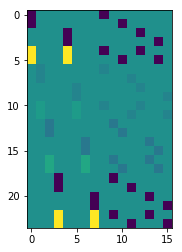

[[-0.435  0.     0.     0.     0.     0.     0.     0.    -0.435 -0.     0.     0.     0.     0.     0.     0.   ]
 [-0.435  0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.435 -0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.435  0.     0.     0.     0.     0.     0.     0.    -0.435 -0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.435  0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.435 -0.   ]
 [ 0.435  0.     0.     0.     0.435  0.     0.     0.    -0.435 -0.     0.     0.    -0.435 -0.     0.     0.   ]
 [ 0.435  0.     0.     0.     0.435  0.     0.     0.     0.     0.    -0.435 -0.     0.     0.    -0.435 -0.   ]
 [ 0.    -0.043  0.     0.     0.     0.     0.     0.    -0.043 -0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.043  0.     0.     0.     0.     0.     0.     0.     0.    -0.    -0.043  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.043  0.     0.     0.     0.     0.     

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Bmx)
plt.show()
np.set_printoptions(precision=3, linewidth=150)
print(Bmx)

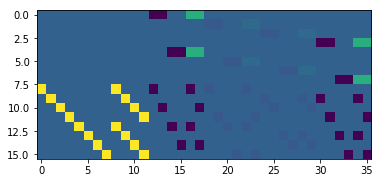

[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.455 -0.455  0.     0.     0.455  0.455  0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.045 -0.045  0.
   0.     0.045  0.045  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.    -0.045 -0.045  0.     0.     0.045  0.045  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.455 -0.455  0.     0.   

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Cmx.T)
plt.show()
np.set_printoptions(precision=3, linewidth=150)
print(Cmx.T)